## Importación de las librerías

In [1]:
import utils
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Conjuntos de entrenamiento y test y CV controller

In [2]:
X_train, X_test, y_train, y_test = utils.get_train_test_data()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7776, 12) (1022, 12) (7776,) (1022,)


In [3]:
cv = utils.get_stratified_shuffle_cv()
print(cv)

StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8)


## Búsqueda de los hiperparámetros del árbol de clasificación

### Seleccionamos max_depth del árbol de clasificación

In [24]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': list(range(5,101,5))
}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=99),
                              param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=3)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.902 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.906 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.900 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.890 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.898 total time=   0.0s
[CV 1/5] END ......criterion=gini, max_depth=10;, score=0.908 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=10;, score=0.928 total time=   0.0s
[CV 3/5] END ......criterion=gini, max_depth=10;, score=0.910 total time=   0.0s
[CV 4/5] END ......criterion=gini, max_depth=10;, score=0.912 total time=   0.0s
[CV 5/5] END ......criterion=gini, max_depth=10;, score=0.907 total time=   0.0s
[CV 1/5] END ......criterion=gini, max_depth=15;, score=0.924 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=15

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=DecisionTreeClassifier(random_state=99),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                       55, 60, 65, 70, 75, 80, 85, 90, 95,
                                       100]},
             scoring='roc_auc', verbose=3)

Pintamos el **roc_auc medio en test de validación** a medida que aumenta el **max_depth** para cada uno de los distintos **criterios**

<AxesSubplot:xlabel='max_depth', ylabel='mean_test_score'>

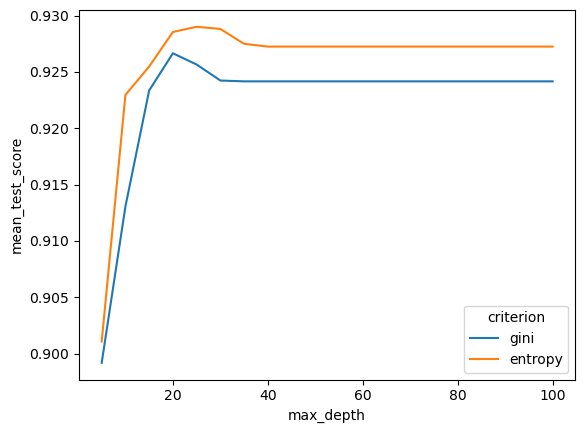

In [25]:
criterion_list = list(grid_search_cv.cv_results_['param_criterion'].data)
max_depth_list = list(grid_search_cv.cv_results_['param_max_depth'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
max_depth_df = pd.DataFrame(list(zip(criterion_list, max_depth_list, mean_test_score_list)), columns=['criterion', 'max_depth', 'mean_test_score'])
sns.lineplot(data=max_depth_df, x="max_depth", y="mean_test_score", hue="criterion")

In [26]:
max_depth_df.sort_values(['criterion', 'max_depth', 'mean_test_score'], ascending=True)

,criterion,max_depth,mean_test_score
20,entropy,5,0.901083
21,entropy,10,0.922967
22,entropy,15,0.925477
23,entropy,20,0.928544
24,entropy,25,0.929007
25,entropy,30,0.928814
26,entropy,35,0.927498
27,entropy,40,0.927249
28,entropy,45,0.927249
29,entropy,50,0.927249


Para el modelo final se probarán todos los valores entre [10, 20] para el parámetro **max_depth**

In [27]:
max_depth_final_values = list(range(10,21,2))
max_depth_final_values

[10, 12, 14, 16, 18, 20]

### Seleccionamos min_samples_leaf (minbucket) del árbol de clasificación

In [28]:
param_grid = {
    'criterion': ['gini','entropy'],
    'min_samples_leaf': list(range(5,101,5)),
}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=99),
                              param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=3)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END criterion=gini, min_samples_leaf=5;, score=0.951 total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_leaf=5;, score=0.962 total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_leaf=5;, score=0.953 total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_leaf=5;, score=0.948 total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_leaf=5;, score=0.955 total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_leaf=10;, score=0.961 total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_leaf=10;, score=0.969 total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_leaf=10;, score=0.964 total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_leaf=10;, score=0.957 total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_leaf=10;, score=0.966 total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_leaf=15;, score=0.961 total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=DecisionTreeClassifier(random_state=99),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                              50, 55, 60, 65, 70, 75, 80, 85,
                                              90, 95, 100]},
             scoring='roc_auc', verbose=3)

Pintamos el **roc_auc medio en test de validación** a medida que aumenta el min_samples_leaf para cada uno de los distintos criterios

<AxesSubplot:xlabel='min_samples_leaf', ylabel='mean_test_score'>

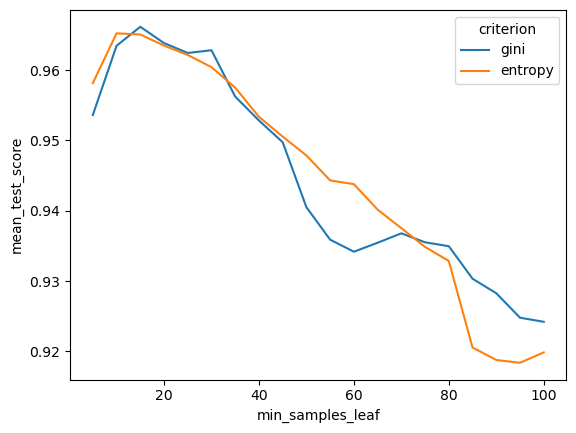

In [29]:
criterion_list = list(grid_search_cv.cv_results_['param_criterion'].data)
min_samples_leaf_list = list(grid_search_cv.cv_results_['param_min_samples_leaf'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
min_samples_leaf_df = pd.DataFrame(list(zip(criterion_list, min_samples_leaf_list, mean_test_score_list)), columns=['criterion', 'min_samples_leaf', 'mean_test_score'])
sns.lineplot(data=min_samples_leaf_df, x="min_samples_leaf", y="mean_test_score", hue="criterion")

In [30]:
min_samples_leaf_df.sort_values(['criterion', 'min_samples_leaf', 'mean_test_score'], ascending=True)

,criterion,min_samples_leaf,mean_test_score
20,entropy,5,0.958148
21,entropy,10,0.965222
22,entropy,15,0.965060
23,entropy,20,0.963484
24,entropy,25,0.962149
25,entropy,30,0.960420
26,entropy,35,0.957507
27,entropy,40,0.953349
28,entropy,45,0.950544
29,entropy,50,0.947856


Para el modelo final se probarán los valores entre [10, 16] para el parámetro **min_samples_leaf**

In [34]:
min_samples_leaf_final = list(range(11,16,1))
min_samples_leaf_final

[11, 12, 13, 14, 15]

### Seleccionamos min_samples_split del árbol de clasificación

In [35]:
param_grid = {
    'criterion': ['gini','entropy'],
    'min_samples_split': list(range(5,101,5)),
}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=99),
                              param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=3)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END criterion=gini, min_samples_split=5;, score=0.928 total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=5;, score=0.939 total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=5;, score=0.937 total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=5;, score=0.935 total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=5;, score=0.938 total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=10;, score=0.944 total time=   0.0s
[CV 2/5] END criterion=gini, min_samples_split=10;, score=0.954 total time=   0.0s
[CV 3/5] END criterion=gini, min_samples_split=10;, score=0.945 total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_split=10;, score=0.948 total time=   0.0s
[CV 5/5] END criterion=gini, min_samples_split=10;, score=0.947 total time=   0.0s
[CV 1/5] END criterion=gini, min_samples_split=15;, score=0.950 total time=   0.0s
[CV 2/5] END criterion=gini, m

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=DecisionTreeClassifier(random_state=99),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [5, 10, 15, 20, 25, 30, 35, 40,
                                               45, 50, 55, 60, 65, 70, 75, 80,
                                               85, 90, 95, 100]},
             scoring='roc_auc', verbose=3)

Pintamos el **roc_auc medio en test de validación** a medida que aumenta el min_samples_split para cada uno de los distintos criterios

<AxesSubplot:xlabel='min_samples_split', ylabel='mean_test_score'>

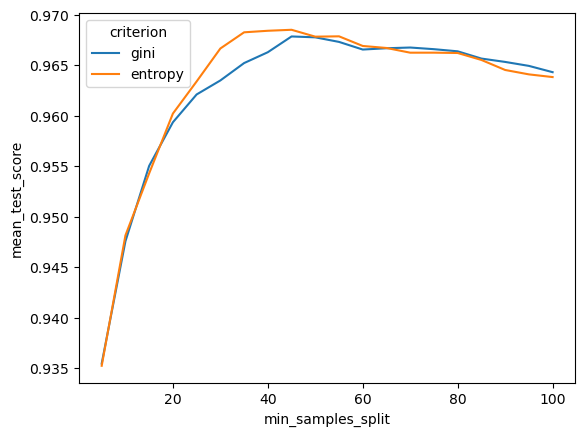

In [36]:
criterion_list = list(grid_search_cv.cv_results_['param_criterion'].data)
min_samples_split_list = list(grid_search_cv.cv_results_['param_min_samples_split'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
min_samples_split_df = pd.DataFrame(list(zip(criterion_list, min_samples_split_list, mean_test_score_list)), columns=['criterion', 'min_samples_split', 'mean_test_score'])
sns.lineplot(data=min_samples_split_df, x="min_samples_split", y="mean_test_score", hue="criterion")

In [37]:
min_samples_split_df.sort_values(['criterion', 'min_samples_split', 'mean_test_score'], ascending=True)

,criterion,min_samples_split,mean_test_score
20,entropy,5,0.935220
21,entropy,10,0.948133
22,entropy,15,0.954284
23,entropy,20,0.960206
24,entropy,25,0.963389
25,entropy,30,0.966654
26,entropy,35,0.968257
27,entropy,40,0.968410
28,entropy,45,0.968508
29,entropy,50,0.967826


Para el modelo final se probarán todos los valores entre [40, 50] para el parámetro **min_samples_split**

In [38]:
min_samples_split_final = list(range(35,46,2))
min_samples_split_final

[35, 37, 39, 41, 43, 45]

## Búsqueda del mejor árbol de clasificación

In [39]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': max_depth_final_values,
    'min_samples_leaf': min_samples_leaf_final,
    'min_samples_split': min_samples_split_final
}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=99),
                              param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=0, n_jobs=-1)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=DecisionTreeClassifier(random_state=99), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': [11, 12, 13, 14, 15],
                         'min_samples_split': [35, 37, 39, 41, 43, 45]},
             scoring='roc_auc')

**Modelo de árbol de clasificación**

In [50]:
print("best_model:", grid_search_cv.best_estimator_)
print("best_model_criterion:", grid_search_cv.best_estimator_.criterion)
print("roc_auc:", grid_search_cv.best_score_)

best_model: DecisionTreeClassifier(max_depth=20, min_samples_leaf=14, min_samples_split=41,
                       random_state=99)
best_model_criterion: gini
roc_auc: 0.9642937860574541


Confusion matrix, without normalization
[[871 101]
 [ 33  17]]


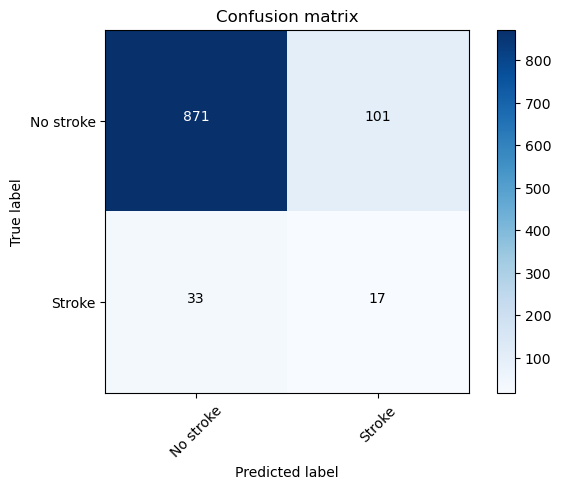

In [51]:
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf=14, min_samples_split=41, random_state=99)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

cm = utils.get_confusion_matrix(y_test, y_pred)
utils.plot_confusion_matrix(cm=cm, classes=['No stroke', 'Stroke'])

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       972
           1       0.14      0.34      0.20        50

    accuracy                           0.87      1022
   macro avg       0.55      0.62      0.57      1022
weighted avg       0.92      0.87      0.89      1022



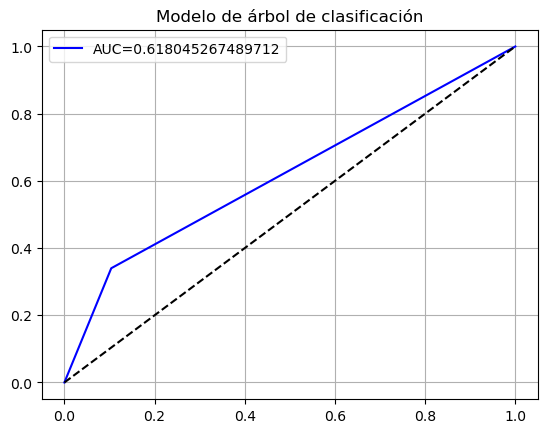

In [52]:
utils.print_metrics(y_test, y_pred, "Modelo de árbol de clasificación")

## Importancia de las variables

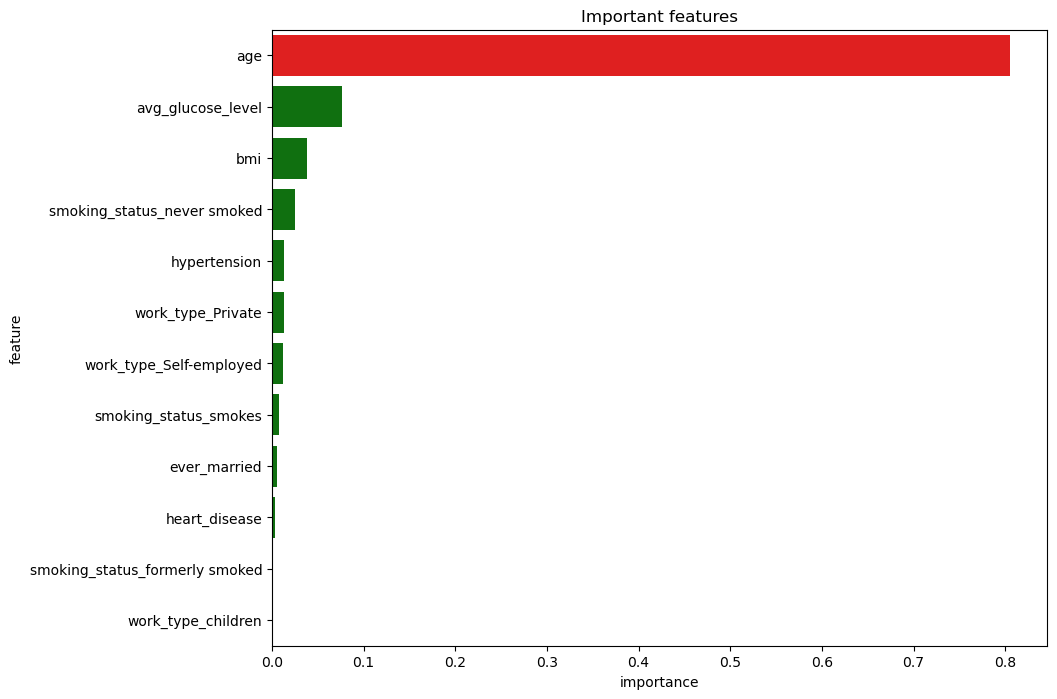

In [53]:
utils.plot_tree_feature_importance(decision_tree_model.feature_names_in_, decision_tree_model.feature_importances_)

## Árbol final

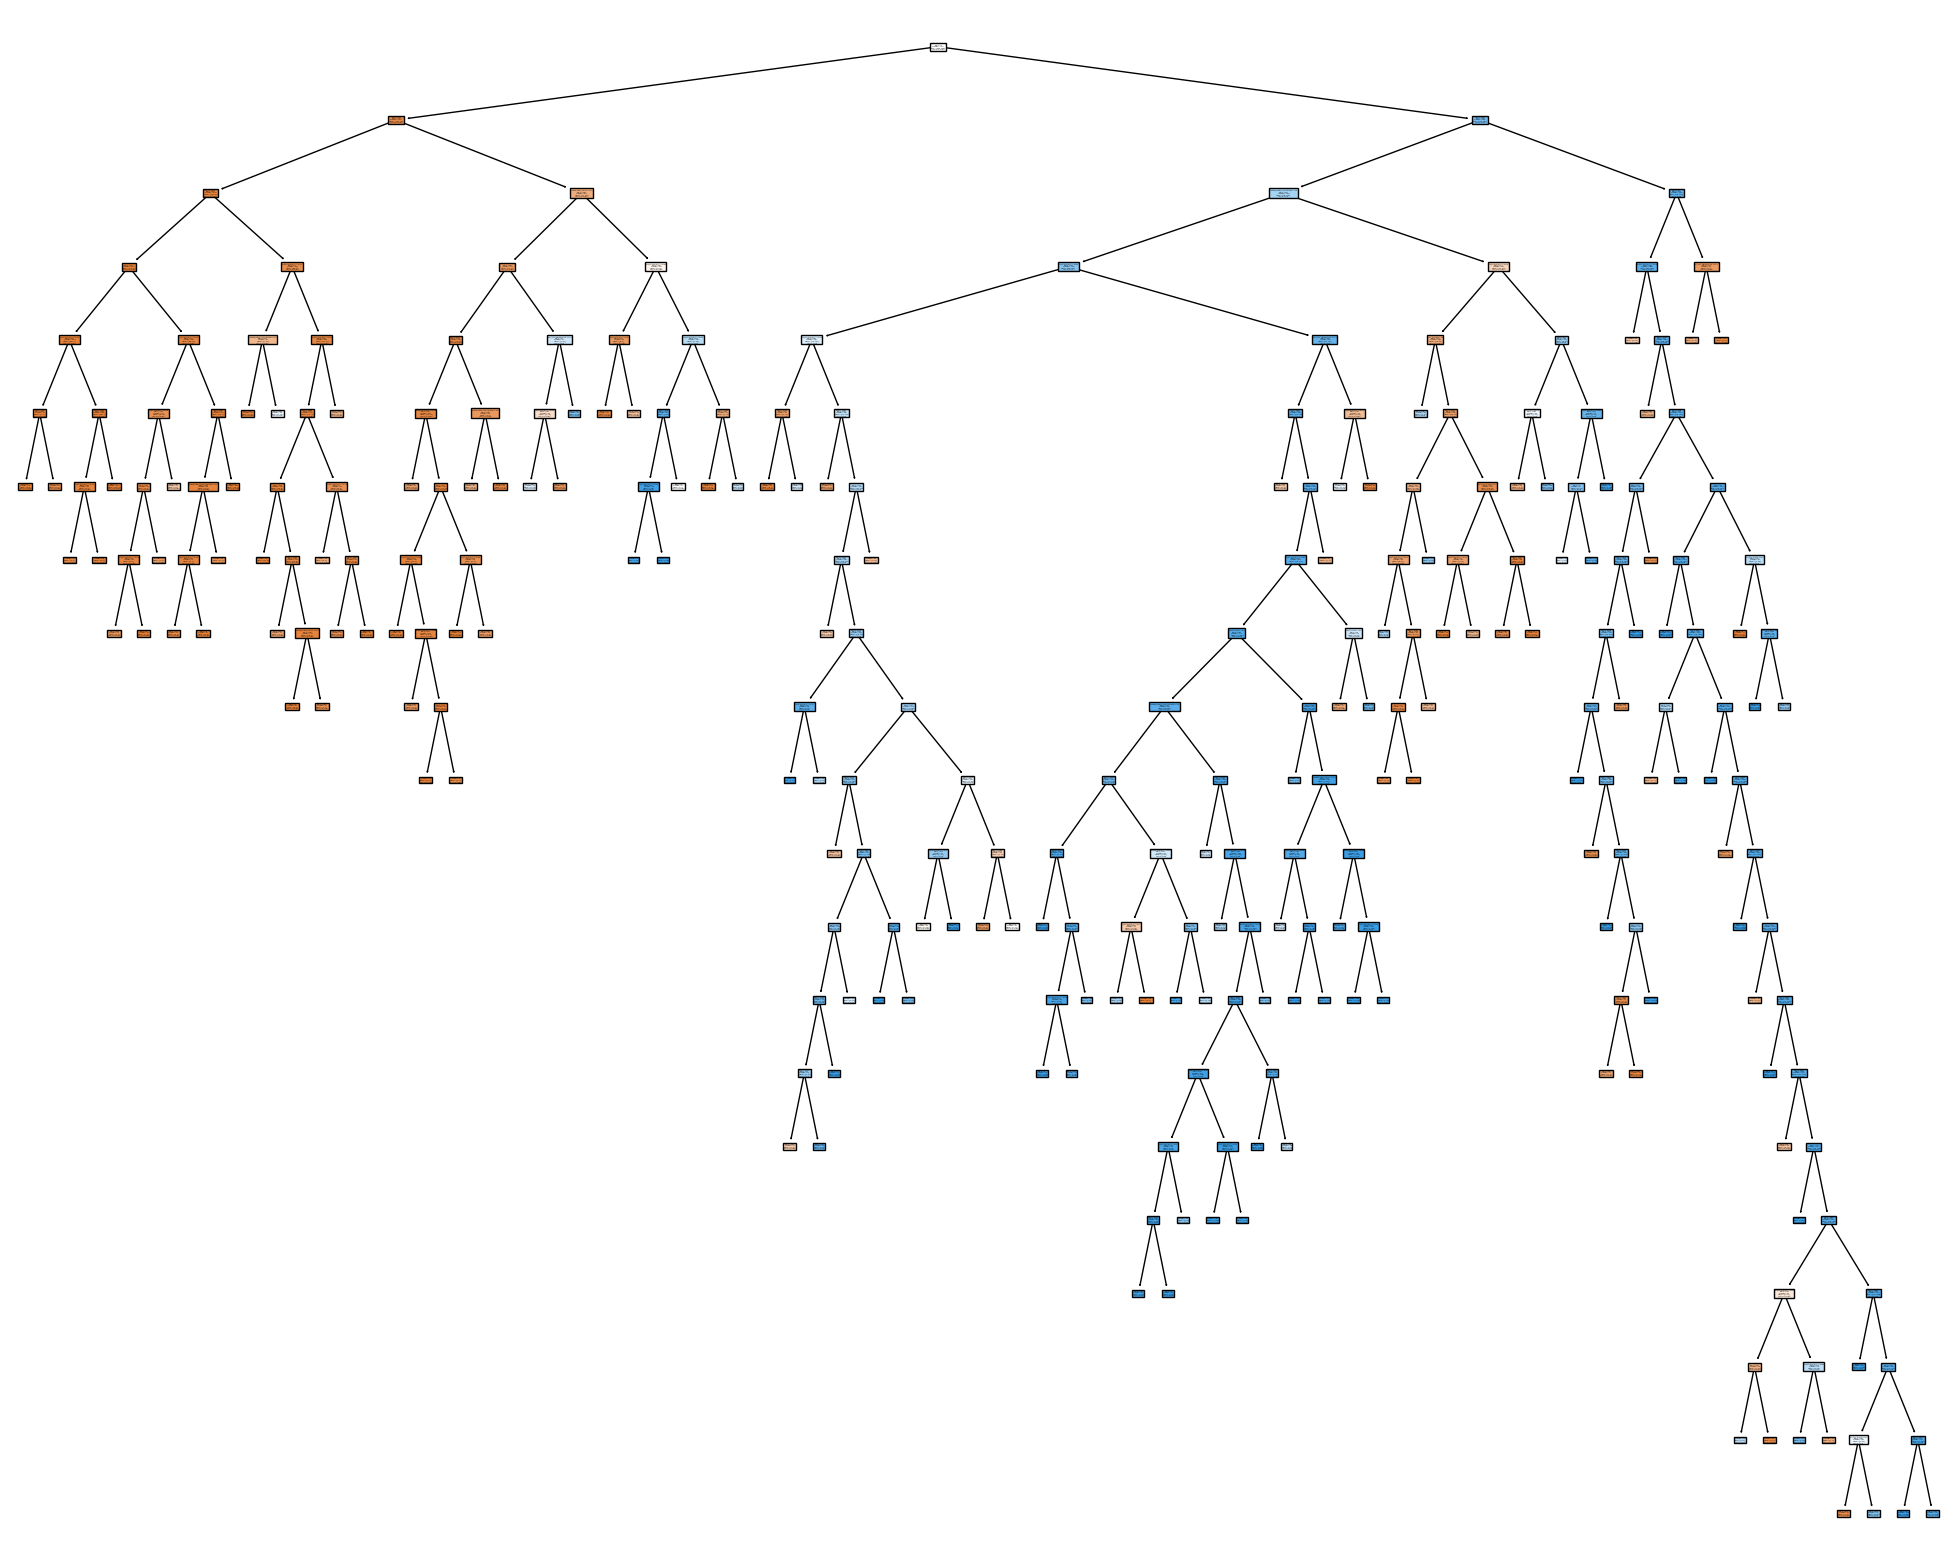

In [54]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_model, 
                   feature_names=decision_tree_model.feature_names_in_,  
                   class_names=['No stroke', 'Stroke'],
                   filled=True)

**Guardamos el modelo para la comparativa final**

In [55]:
pickle.dump(decision_tree_model, open("decision_tree_model.sav", 'wb'))